In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df = pd.read_csv("nhanes.csv")
df.head().T

,0,1,2,3,4
id,62163,62172,62174,62174,62175
Gender,male,female,male,male,male
Age,14,43,80,80,5
Race,Asian,Black,White,White,White
Education,NaN,High School,College Grad,College Grad,NaN
MaritalStatus,NaN,NeverMarried,Married,Married,NaN
RelationshipStatus,NaN,Single,Committed,Committed,NaN
Insured,Yes,Yes,Yes,Yes,Yes
Income,100000.0,22500.0,70000.0,70000.0,12500.0
Poverty,4.07,2.02,4.3,4.3,0.39


In [3]:
df.shape

(5000, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   Gender              5000 non-null   object 
 2   Age                 5000 non-null   int64  
 3   Race                5000 non-null   object 
 4   Education           3584 non-null   object 
 5   MaritalStatus       3585 non-null   object 
 6   RelationshipStatus  3585 non-null   object 
 7   Insured             4993 non-null   object 
 8   Income              4623 non-null   float64
 9   Poverty             4675 non-null   float64
 10  HomeRooms           4972 non-null   float64
 11  HomeOwn             4972 non-null   object 
 12  Work                3842 non-null   object 
 13  Weight              4969 non-null   float64
 14  Height              4841 non-null   float64
 15  BMI                 4834 non-null   float64
 16  Pulse 

In [5]:
df.isnull().sum()

id                       0
Gender                   0
Age                      0
Race                     0
Education             1416
MaritalStatus         1415
RelationshipStatus    1415
Insured                  7
Income                 377
Poverty                325
HomeRooms               28
HomeOwn                 28
Work                  1158
Weight                  31
Height                 159
BMI                    166
Pulse                  718
BPSys                  719
BPDia                  719
Testosterone           874
HDLChol                775
TotChol                775
Diabetes                64
DiabetesAge           4693
nPregnancies          3735
nBabies               3832
SleepHrsNight         1166
PhysActive             850
PhysActiveDays        2614
AlcoholDay            2503
AlcoholYear           2016
SmokingStatus         1413
dtype: int64

In [6]:
# Task 1: Handle missing values (Replace NaN with 0)
df_cleaned = df.fillna(0)

In [7]:
# Convert weight to pounds
df_cleaned["Weight_lbs"] = df_cleaned["Weight"] * 2.2

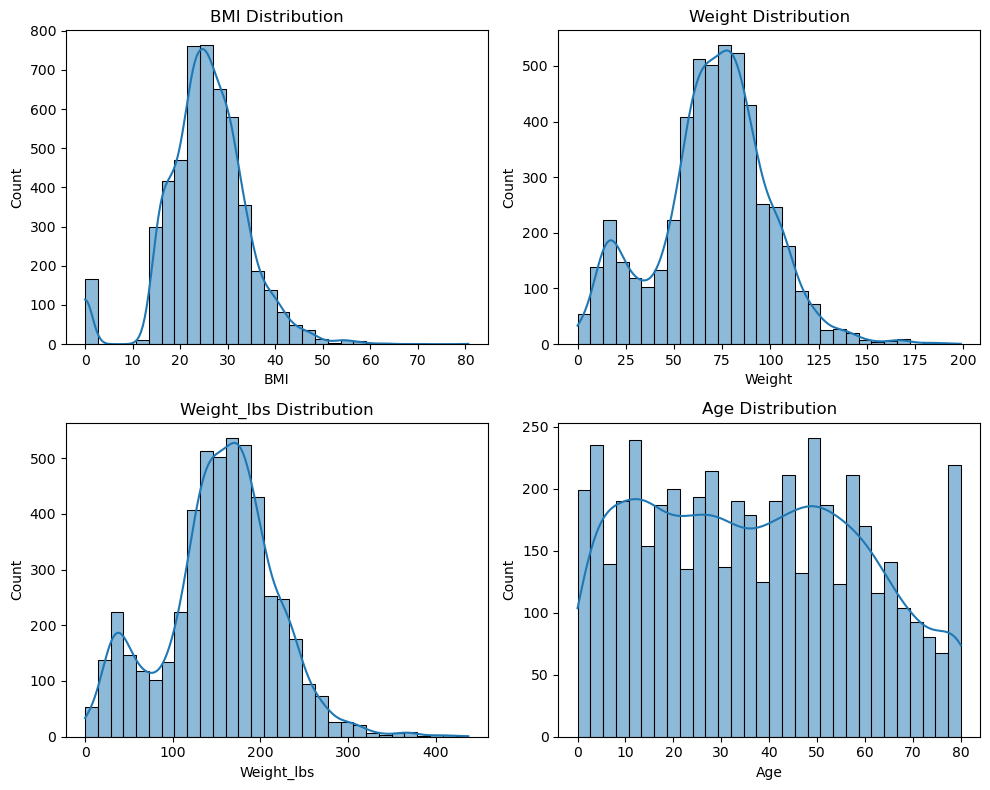

In [8]:
# Task 2: Histogram visualizations for BMI, Weight, Weight in pounds, and Age
# List of columns to plot
columns = ["BMI", "Weight", "Weight_lbs", "Age"]

# Create a 2x2 grid of histograms
plt.figure(figsize=(10, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)  # Arrange plots in 2 rows, 2 columns
    sns.histplot(df_cleaned[col], bins=30, kde=True)  # Histogram with smooth curve
    plt.title(f"{col} Distribution")  # Add title
    plt.xlabel(col)  # Label x-axis
    plt.ylabel("Count")  # Label y-axis

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [9]:
# Task 3: Mean 60-second pulse rate
mean_pulse_rate = df_cleaned["Pulse"].mean()

In [10]:
# Task 4: Range of diastolic blood pressure
min_bp = df_cleaned["BPDia"].min()
max_bp = df_cleaned["BPDia"].max()

In [11]:
# Task 5: Variance and standard deviation for income
income_variance = np.var(df_cleaned["Income"], ddof=1)  # Sample variance
income_std_dev = np.std(df_cleaned["Income"], ddof=1)  # Sample standard deviation

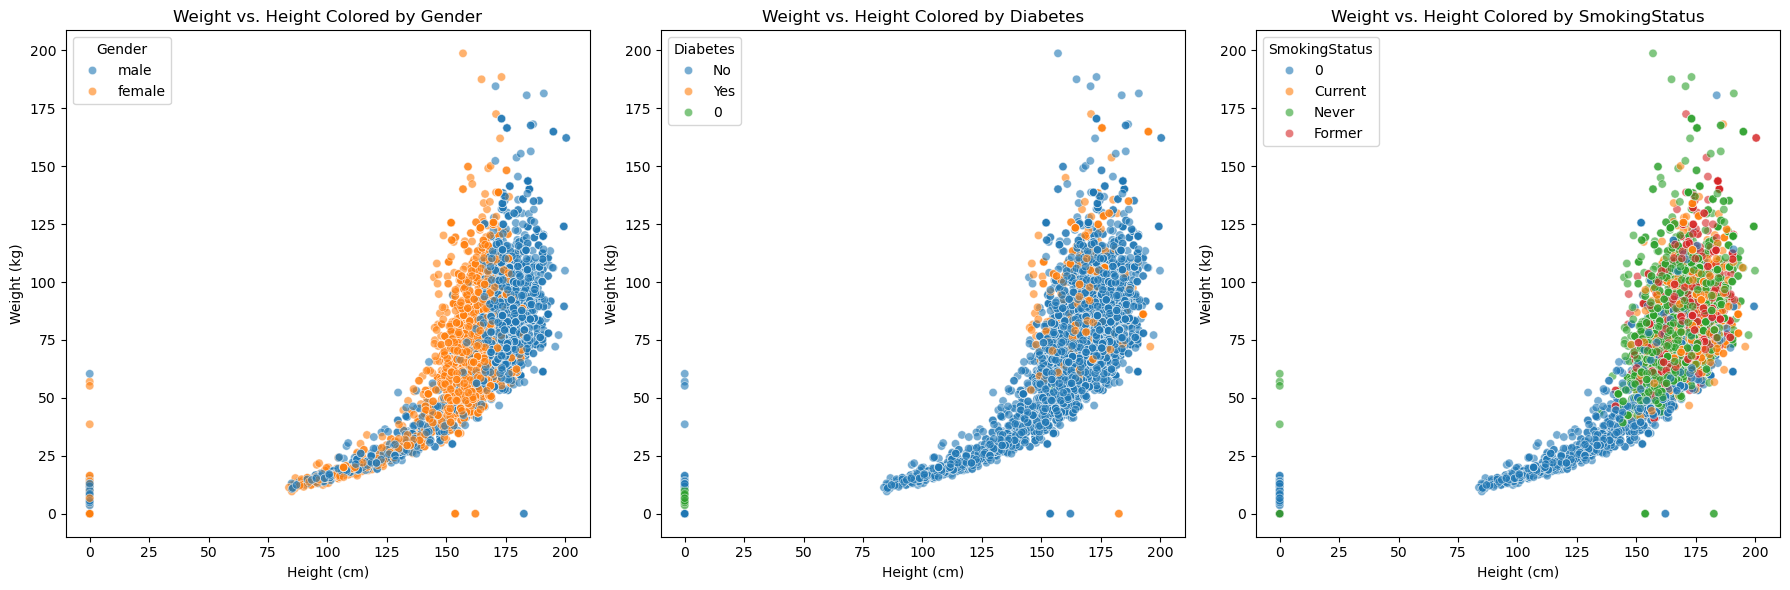

In [12]:
# Task 6: Scatter plots for Weight vs. Height (colored by gender, diabetes, smoking status)
plt.figure(figsize=(18, 6))

categories = ["Gender", "Diabetes", "SmokingStatus"]
for i, cat in enumerate(categories, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df_cleaned["Height"], y=df_cleaned["Weight"], hue=df_cleaned[cat], alpha=0.6)
    plt.title(f"Weight vs. Height Colored by {cat}")
    plt.xlabel("Height (cm)")
    plt.ylabel("Weight (kg)")

plt.tight_layout()
plt.show()

In [13]:
# Task 7: Conduct t-tests

# Age & Gender
male_age = df_cleaned[df_cleaned["Gender"] == "Male"]["Age"]
female_age = df_cleaned[df_cleaned["Gender"] == "Female"]["Age"]
t_stat_age, p_value_age = stats.ttest_ind(male_age, female_age, equal_var=False)

# BMI & Diabetes
diabetes_bmi = df_cleaned[df_cleaned["Diabetes"] == "Yes"]["BMI"]
non_diabetes_bmi = df_cleaned[df_cleaned["Diabetes"] == "No"]["BMI"]
t_stat_bmi, p_value_bmi = stats.ttest_ind(diabetes_bmi, non_diabetes_bmi, equal_var=False)

# Alcohol Year & Relationship Status
alcohol_yes = df_cleaned[df_cleaned["AlcoholYear"] > 0]["AlcoholYear"]
alcohol_no = df_cleaned[df_cleaned["AlcoholYear"] == 0]["AlcoholYear"]
t_stat_alcohol, p_value_alcohol = stats.ttest_ind(alcohol_yes, alcohol_no, equal_var=False)

In [14]:
# Display results
{
    "Mean Pulse Rate": mean_pulse_rate,
    "Diastolic BP Range": (min_bp, max_bp),
    "Income Variance": income_variance,
    "Income Std Dev": income_std_dev,
    "T-test Age & Gender": (t_stat_age, p_value_age),
    "T-test BMI & Diabetes": (t_stat_bmi, p_value_bmi),
    "T-test Alcohol Year & Relationship Status": (t_stat_alcohol, p_value_alcohol)
}

{'Mean Pulse Rate': 63.06,
 'Diastolic BP Range': (0.0, 116.0),
 'Income Variance': 1264147753.5507102,
 'Income Std Dev': 35554.85555519401,
 'T-test Age & Gender': (nan, nan),
 'T-test BMI & Diabetes': (13.912087307486564, 1.721330839025317e-36),
 'T-test Alcohol Year & Relationship Status': (42.27202123462108,
  5.522487557531516e-295)}

### NHANES Data Analysis – Simple Summary

#### Average Pulse Rate: 63.06

#### Diastolic Blood Pressure Range: 0 to 116

#### Income Variability:

Variance: 1.26 billion

Standard Deviation: 35,555

#### T-Test Results (Comparing Groups)

Age & Gender: No valid comparison due to data issues.

BMI & Diabetes: Significant difference. People with diabetes have different BMI levels (p < 0.00001).

Alcohol & Relationship Status: Strong difference. Alcohol consumption varies based on relationship status (p < 0.00001)